In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

In [54]:
# 각 X입력에 가중치를 곱하고 합을 구한 후 반환
def net_input(X, w):
    # X: list, w: list
    # return sum([vx * vw for vx, vw in zip(X, w[1:])]) + w[0]
    return np.dot(X, w[1:]) + w[0]

net_input(X=[5.1, 3.5, 1.4, 0.2], w=[0.2, 1.5, -0.5, 3.1, 2.5])

10.939999999999998

In [55]:
def activation(v):
    # if v > 0:
    #     return 1
    # else:
    #     return -1
    
    return 1 if v > 0 else -1

activation(0.7), activation(-0.3)

(1, -1)

In [5]:
def predict(X, w):
    net_value = net_input(X, w)
    activated_value = activation(net_value)
    return activated_value

predict([1, 2, 3, 4], [0.5, 10, -6, 4, -13])

-1

In [17]:
def fit(X, y, eta, n_iter):
    w = np.zeros(1 + X.shape[1]) # 가중치 배열 생성 및 초기화 : 갯수는 X의 컬럼 갯수 + 1
    errors = [] # error log용 리스트 (각 반복마다 error 값을 저장)

    for _ in np.arange(n_iter):
        error_sum = 0
        for xv, t in zip(X, y): # 한 행의 값(X, y)을 뽑아서 -> 총 100번 반복
            output = predict(xv, w) # net_input + activation -> -1 or 1을 도출
            error = t - output # 오차 계산 (실제값 - 출력값)
            error_sum += error # 발생한 오차를 기록에 남기기

            delta = eta * error # 학습률을 적용해서 업데이트할 값을 도출 -> 실제 조정에 적용할 비율
            w[1:] += delta * xv # 기존 입력값에 대한 가중치에 조정할 값을 적용
            w[0] += delta * 1 # 기존 절편(편향) 가중치에 조정할 값을 적용

        errors.append(error_sum)
    
    return w, errors

In [47]:
iris_dataset = load_iris()
iris_dataset.keys() # iris_dataset에 포함된 정보의 이름
# print( iris_dataset['DESCR'] )
# iris_dataset['data'] # X : shape -> 150 x 4
iris_dataset['target'] # y : shape -> 150 X 1
# iris_dataset['target_names']

# [ list(x) + [y] for x, y in zip(iris_dataset["data"], iris_dataset['target']) ]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

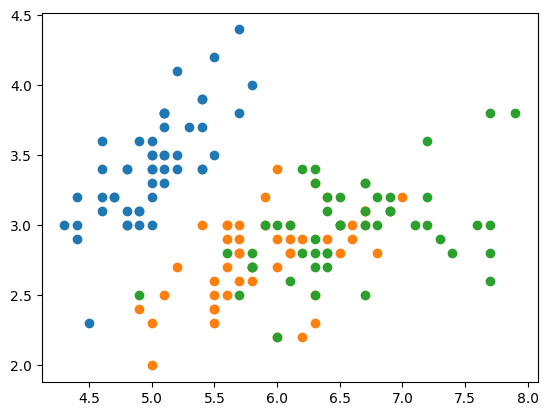

In [52]:
X = iris_dataset['data']
y = iris_dataset['target']

# 분류가 잘되는 품종 찾기
plt.scatter(X[:50,0], X[:50, 1])
plt.scatter(X[50:100, 0], X[50:100, 1])
plt.scatter(X[100:, 0], X[100:, 1])
plt.show()

In [49]:
np.unique( iris_dataset['target'] ) # 원본 데이터의 target 값은 세 종류 : perceptron에 적합하지 않음

array([0, 1, 2])

In [36]:
# 2진 분류가 가능하도록 y가 두 개의 값만 갖는 범위로 제한 + y값은 1, -1로 변경
X = X[:100]
# y = list(map(lambda v: 1 if v == 0 else -1, y))
y = np.where(y[:100] == 0, 1, -1) # setosa = 1, versicolor = -1

In [39]:
X.shape, y.shape, y[:5], y[-5:]

((100, 4), (100,), array([1, 1, 1, 1, 1]), array([-1, -1, -1, -1, -1]))

In [40]:
# w, errors = fit(iris_dataset['data'], iris_dataset['target'], 0.1, 10)
w, errors = fit(X, y, 0.1, 10)

In [41]:
w, errors

(array([ 0.2 ,  0.26,  0.82, -1.04, -0.44]), [0, 0, 2, 0, 0, 0, 0, 0, 0, 0])